### Q.2 Replicate the experiment described in the CalTech Lecture:11 Overfitting

In [1]:
# Importing libraries and important modules
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from math import log
from scipy.optimize import curve_fit

#### Impact of Noise Level and Target Complexity

In [2]:
# Generating Legendre Polynomials
def P(n, x): 
    if(n == 0):
        return 1 # P0 = 1
    elif(n == 1):
        return x # P1 = x
    else:
        return (((2 * n)-1)*x * P(n-1, x)-(n-1)*P(n-2, x))/float(n)

In [3]:
# Function to generate data samples of the form y = summation (aq*x^q) + ep(x) (from q=0 to Qf complexity)
# s:Noise level, q:Model Complexity, n:Data set size; higher order coefficients generated as per legendre polynomials

#Generating Data for training 
def data_generator(s,n,q):
    xv=np.arange(0,n) #Evenly spaced x values
    yv=[]
    for i in range(0,n):
        c=0
        for j in range(0,q+1):
            c=c+P(j,xv[i])
        y=c+np.random.normal(0,s) #Adds noise
        yv.append(y)
    return xv,yv

#Generating Data for testing
def data_generator_test(n,q):
    xv=np.arange(0,n)
    yv=[]
    for i in range(0,n):
        c=0
        for j in range(0,q+1):
            c=c+P(j,xv[i])
        y=c
        yv.append(y)
    return xv,yv

#### Impact of Noise Levels for different number of data points

In [9]:
# List of Noise Levels (Gaussian Variance)
s=list(np.linspace(0,3,40))
# List of Data Points
Nd=list(np.linspace(10,150,40,dtype='int'))

# Fitting a polynomial of degree 2
def noise_level_2(n):
    I2=[] # List to store In-Sample error generated upon fitting a 2 degree polynomial for given dataset size n
    O2=[] # List to store Out-of-Sample error generated upon fitting a 2 degree polynomial for given dataset size n
    X_test,Y_test=data_generator_test(10*n,11)
    for i in s:   
    # Generating the dataset using helper function defined earlier with a particular variance i
    # Assume a Fixed Model Complexity of 11
        X,Y=data_generator(i,n,11)
        poly_reg = PolynomialFeatures(degree=2)
        X_poly = poly_reg.fit_transform(np.array(X).reshape(-1,1))
        X_poly_test = poly_reg.fit_transform(np.array(X_test).reshape(-1,1))
        pol_reg_model = LinearRegression()
        pol_reg_model.fit(X_poly, Y)
        Y_pred_i=pol_reg_model.predict(X_poly)
        Y_pred_o=pol_reg_model.predict(X_poly_test)
        I2.append(mean_squared_error(Y_pred_i,Y))
        O2.append(mean_squared_error(Y_pred_o,Y_test))   
    return I2,O2

I_2=[] # A List to store lists of In-sample errors for different dataset sizes upon fitting a 2 degree polynomial
O_2=[] # A List to store lists of Out-of-sample errors for different dataset sizes upon fitting a 2 degree polynomial
for i in Nd:
    m,n=noise_level_2(i)
    I_2.append(m)
    O_2.append(n)

In [10]:
# List of Noise Levels (Gaussian Variance)
s=list(np.linspace(0,3,40))
# List of Data Points
Nd=list(np.linspace(10,150,40,dtype='int'))

def noise_level_10(n):
    I10=[] # List to store In-Sample error generated upon fitting a 10 degree polynomial for given dataset size n
    O10=[] # List to store Out-of-Sample error generated upon fitting 10 degree polynomial for given dataset size n
    X_test,Y_test=data_generator_test(10*n,11)
    for i in s:   
    # Generating the dataset using helper function defined earlier with a particular variance i
    # Assume a Fixed Model Complexity of 11
        X,Y=data_generator(i,n,11)
        poly_reg = PolynomialFeatures(degree=10)
        X_poly = poly_reg.fit_transform(np.array(X).reshape(-1,1))
        X_poly_test = poly_reg.fit_transform(np.array(X_test).reshape(-1,1))
        pol_reg_model = LinearRegression()
        pol_reg_model.fit(X_poly, Y)
        Y_pred_i=pol_reg_model.predict(X_poly)
        Y_pred_o=pol_reg_model.predict(X_poly_test)
        I10.append(mean_squared_error(Y_pred_i,Y))
        O10.append(mean_squared_error(Y_pred_o,Y_test))  
    return I10,O10

I_10=[] # A List to store lists of In-sample errors for different dataset sizes upon fitting a 10 degree polynomial
O_10=[] # A List to store lists of Out-of-sample errors for different dataset sizes upon fitting a 10 degree polynomial
for i in Nd:
    x,y=noise_level_10(i)
    I_10.append(x)
    O_10.append(y)

In [11]:
#Storing the calculated overfit measure for each value of variance for given number of points
overfit_n=[] 
for i in range(len(O_10)):
    m=[]
    for j in range(len(s)):
        m.append(O_10[i][j]-O_2[i][j])
    overfit_n.append(m)

In [12]:
overfit_array=np.array(overfit_n)

C:\Users\Sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


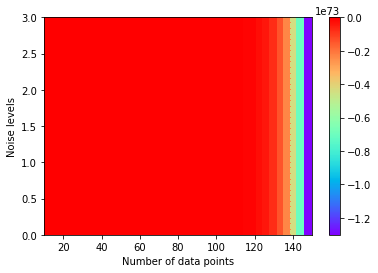

In [13]:
# To visualize the impact of noise levels on overfitting via an intensity plot
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
y,x=np.meshgrid(s,Nd)
c = plt.pcolormesh(x, y, overfit_array, cmap ='rainbow')
plt.xlabel("Number of data points")
plt.ylabel("Noise levels")
plt.colorbar(c)
plt.show()


#### Impact of Target complexity for different number of data points

In [4]:
# List of Complexity levels
c=list(np.linspace(1,15,5))
# List of Data Points
Nd=list(np.linspace(10,150,50,dtype='int'))

def complexity_level_2(n):
    I2=[] # List to store In-Sample error generated upon fitting a 2 degree polynomial for given dataset size n
    O2=[] # List to store Out-of-Sample error generated upon fitting a 2 degree polynomial for given dataset size n
    for i in c:
    # Generating the dataset with fixed variance 1 and a particular target complexity i
        X,Y=data_generator(1,n,int(i))
        X_test,Y_test=data_generator_test(10*n,int(i))
        poly_reg = PolynomialFeatures(degree=2)
        X_poly = poly_reg.fit_transform(np.array(X).reshape(-1,1))
        X_poly_test = poly_reg.fit_transform(np.array(X_test).reshape(-1,1))
        pol_reg_model = LinearRegression()
        pol_reg_model.fit(X_poly, Y)
        Y_pred_i=pol_reg_model.predict(X_poly)
        Y_pred_o=pol_reg_model.predict(X_poly_test)
        I2.append(mean_squared_error(Y_pred_i,Y))
        O2.append(mean_squared_error(Y_pred_o,Y_test))   
    return I2,O2

I_2_c=[] # A List to store lists of In-sample errors for different dataset sizes upon fitting a 2 degree polynomial
O_2_c=[] # A List to store lists of Out-of-sample errors for different dataset sizes upon fitting a 2 degree polynomial
for i in Nd:
    x,y=complexity_level_2(i)
    I_2_c.append(x)
    O_2_c.append(y)

In [5]:
# List of Complexity levels
c=list(np.linspace(1,15,5))
# List of Data Points
Nd=list(np.linspace(10,150,50,dtype='int'))

def complexity_level_10(n):
    I10=[] # List to store In-Sample error generated upon fitting a 10 degree polynomial for given dataset size n
    O10=[] # List to store Out-of-Sample error generated upon fitting a 10 degree polynomial for given dataset size n
    for i in c:
        # Generating the dataset with fixed variance 1 and a particular target complexity i
        X,Y=data_generator(1,n,int(i))
        X_test,Y_test=data_generator_test(10*n,int(i))
        poly_reg = PolynomialFeatures(degree=10)
        X_poly = poly_reg.fit_transform(np.array(X).reshape(-1,1))
        X_poly_test = poly_reg.fit_transform(np.array(X_test).reshape(-1,1))
        pol_reg_model = LinearRegression()
        pol_reg_model.fit(X_poly, Y)
        Y_pred_i=pol_reg_model.predict(X_poly)
        Y_pred_o=pol_reg_model.predict(X_poly_test)
        I10.append(mean_squared_error(Y_pred_i,Y))
        O10.append(mean_squared_error(Y_pred_o,Y_test)) 
    return I10,O10

I_10_c=[] # A List to store lists of In-sample errors for different dataset sizes upon fitting a 10 degree polynomial
O_10_c=[] # A List to store lists of Out-of-sample errors for different dataset sizes upon fitting a 10 degree polynomial
for i in Nd:
    x,y=complexity_level_10(i)
    I_10_c.append(x)
    O_10_c.append(y)

In [6]:
#Storing the calculated overfit measure for each value of target complexity for given number of points
overfit_c=[] 
for i in range(len(O_10_c)):
    m=[]
    for j in range(len(c)):
        m.append(O_10_c[i][j]-O_2_c[i][j])
    overfit_c.append(m)

In [7]:
overfit_array_c=np.array(overfit_c)

C:\Users\Sneha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


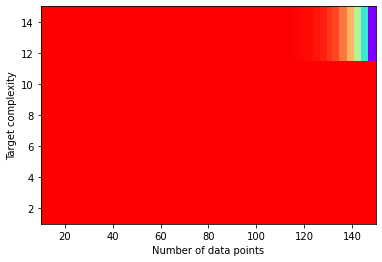

In [8]:
# To visualize the impact of target complexity on overfitting via an intensity plot
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
y,x=np.meshgrid(c,Nd)
c = plt.pcolormesh(x, y, overfit_array_c, cmap ='rainbow')
plt.xlabel("Number of data points")
plt.ylabel("Target complexity")
# plt.colorbar(c)
plt.show()

#### Observations:
1. We would like to observe the effects of Noise levels, Complexity of target and Data set size on overfitting.
2. Overfit measure is taken as the difference between the out-of sample errors obtained between a 10th order & a 2nd order fit.
3. A positive overfit measure implies the existence of high overfitting; a negative overfit measure implies that the higher order fit performs better and that there is no overfitting.
4. x takes evenly-spaced values between 0 and n and the coefficients of higher order terms are given as per the Legendre Polynomials.The error is assumed to be gaussian and the datasets for training and testing are generated separately.
5. The 2nd order and 10th order polynomials are fit using the Polynomial Features class and the fit regression model is used to predict on the test set. This is performed for a number of different dataset sizes for: (i) Different values of noise levels (variances) with a fixed model complexity of 11 and (ii) Different levels of target complexity for a fixed variance value 1.
6. The calculated overfit measure is used to plot the results, where the noise levels and target complexity is taken on the Y-axis while the number of data points is taken on the x-axis. The colour of the plots is determined by the intensity of the calculated overfit measure.
7. From the plot 1, we can observe that as noise levels increase, overfitting worsens for a given set of data points.
8. From the plot 1, we can observe that an increase in the data points leads to a reduction in overfitting.
9. From the plot 2, we can observe that as target complexity increases, overfitting worsens for a given set of data points while an increase in the data points causes less overfitting.
10. The plot 1 basically depicts the impact of **Stochastic noise** on overfitting. On the other hand, plot 2 depicts **Deterministic noise** arising due to a complex target function that is not being captured by the hypothesis set, that ends up causing overfitting.
11. As shown in the Caltech lecture, the effect of overfitting in Plot 2 can be observed significantly for target complexity close to 10 and above. The effect of target complexity values of above 15 could not be shown due to extremely long computation times.

#### References:

1. CalTech:Lecture 11, Overfitting, https://www.youtube.com/watch?v=EQWr3GGCdzw&t=1744s
2. Polynomial Regression in Python, https://data36.com/polynomial-regression-python-scikit-learn/